In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
tweets = pd.read_csv("covid19_tweets.csv")

In [ ]:
tweets.shape

In [5]:
tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In this note I will be investigating a set of Twitter tweets that uses the hashtag "COVID19" and plotting the location of the tweeters in a map.

In [ ]:
tweets.info()

In [7]:
tweets.describe()

,user_followers,user_friends,user_favourites
count,1.476010e+05,147601.000000,1.476010e+05
mean,1.096936e+05,2089.351569,1.415404e+04
std,8.350865e+05,9067.479411,4.357275e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.730000e+02,148.000000,2.020000e+02
50%,1.003000e+03,541.000000,1.750000e+03
75%,5.353000e+03,1712.000000,9.148000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [ ]:
pd.isnull(tweets).sum()

In [9]:
#plot missing values

def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()/len(data_frame)
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

In [ ]:
return_missing_values(tweets)

In [ ]:
def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='whitegrid', color_codes=True)
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.xticks(rotation=90)
    plt.show()

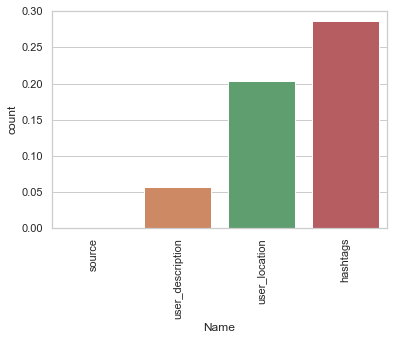

In [12]:
plot_missing_values(tweets)

In [ ]:
#drawing heatmap
sns.heatmap(tweets.isnull(), cbar=True, yticklabels = True)

# LOcation

Most tweeted countries on COVID matters


In [ ]:
tweets['country_name'] = tweets['user_location'].str.split(',').str[-1]

tweets['only_date'] = pd.to_datetime(covid['date']).dt.date

#Keeping countries with valid country name
with_country_name = tweets[tweets['country_name'].isin(list(country_code['COUNTRY']))]
with_country_name['filtered_name'] = tweets['country_name']



In [ ]:
tweet_df=with_country_name.append(without_country_name)
tweet_state_count=tweet_df['filtered_name'].value_counts().to_frame().reset_index().rename(columns={'index':'country','filtered_name':'count'})
all_tweet_location=pd.merge(tweet_state_count,country_code[['COUNTRY','CODE']],left_on="country",right_on="COUNTRY",how="left")
all_tweet_location=all_tweet_location[all_tweet_location['COUNTRY'].notnull()]
all_tweet_location.head(2)